# exc 1a

Creating a dataset for:

$$
f(x) = \frac{1}{1+25x^2}, \quad x \in [-1,1]
$$

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


In [2]:
#n = 100
#x = np.linspace(-1,1, n) #x within interval [-1,1]
#denominator = 1+(25*x**2)
#defining y and adding noise as a normal distrubution with mean 0 and std 1
#y = 1/denominator + np.random.normal(0, 1, x.shape) 


In [3]:
#Perform a standard ordinary least square regression analysis
#Import polynimial features from func_list and OLS_parameters
from func_list import polynomial_features, OLS_parameters#, mse_poly_plot

In [4]:
#The task says to use a polynomial higher than 15 so we have used 16 with intercept not included
#X_task1 = polynomial_features(x, p = 16, intercept = False) 

#checking that it works as it should
#print(X_task1) 

/var/folders/sq/5plwdlr95mscbwq45zg5whjc0000gn/T/ipykernel_58115/1875719197.py:53: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


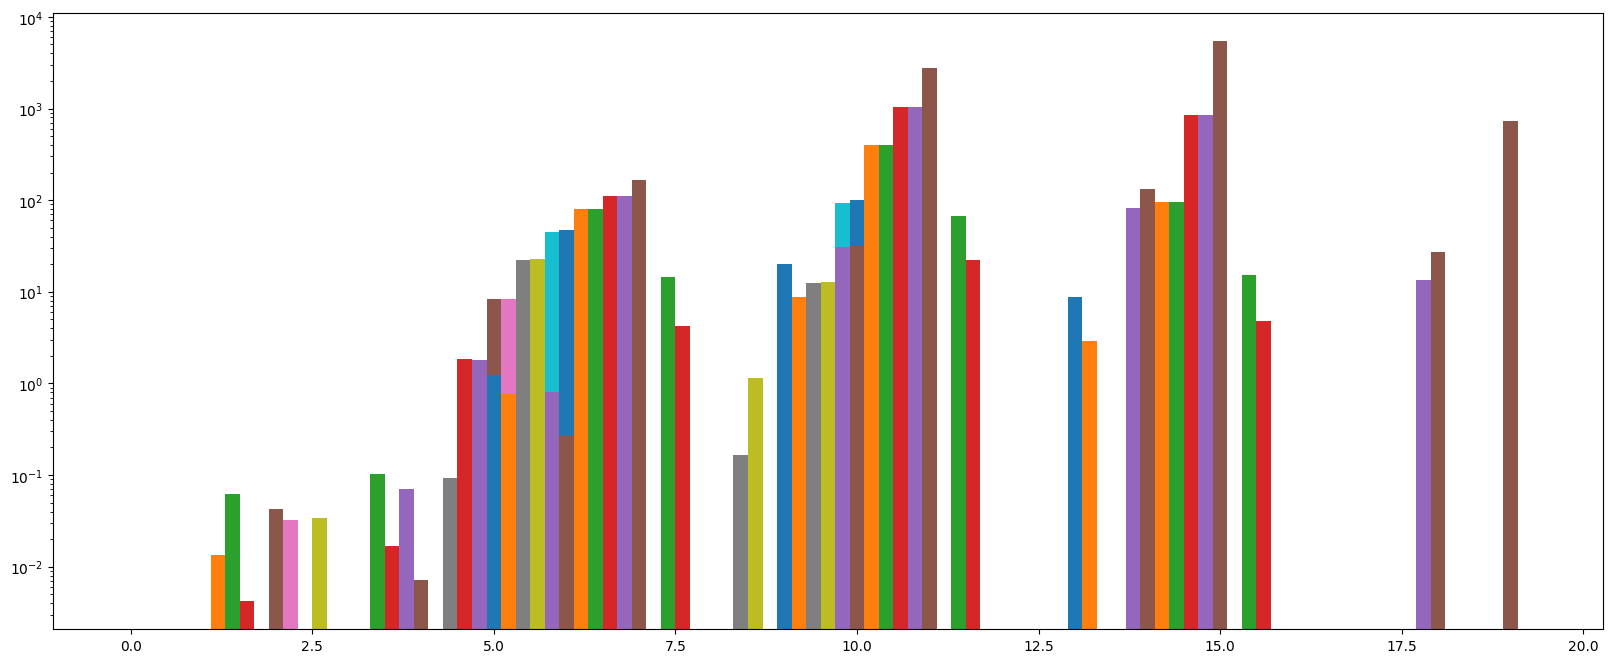

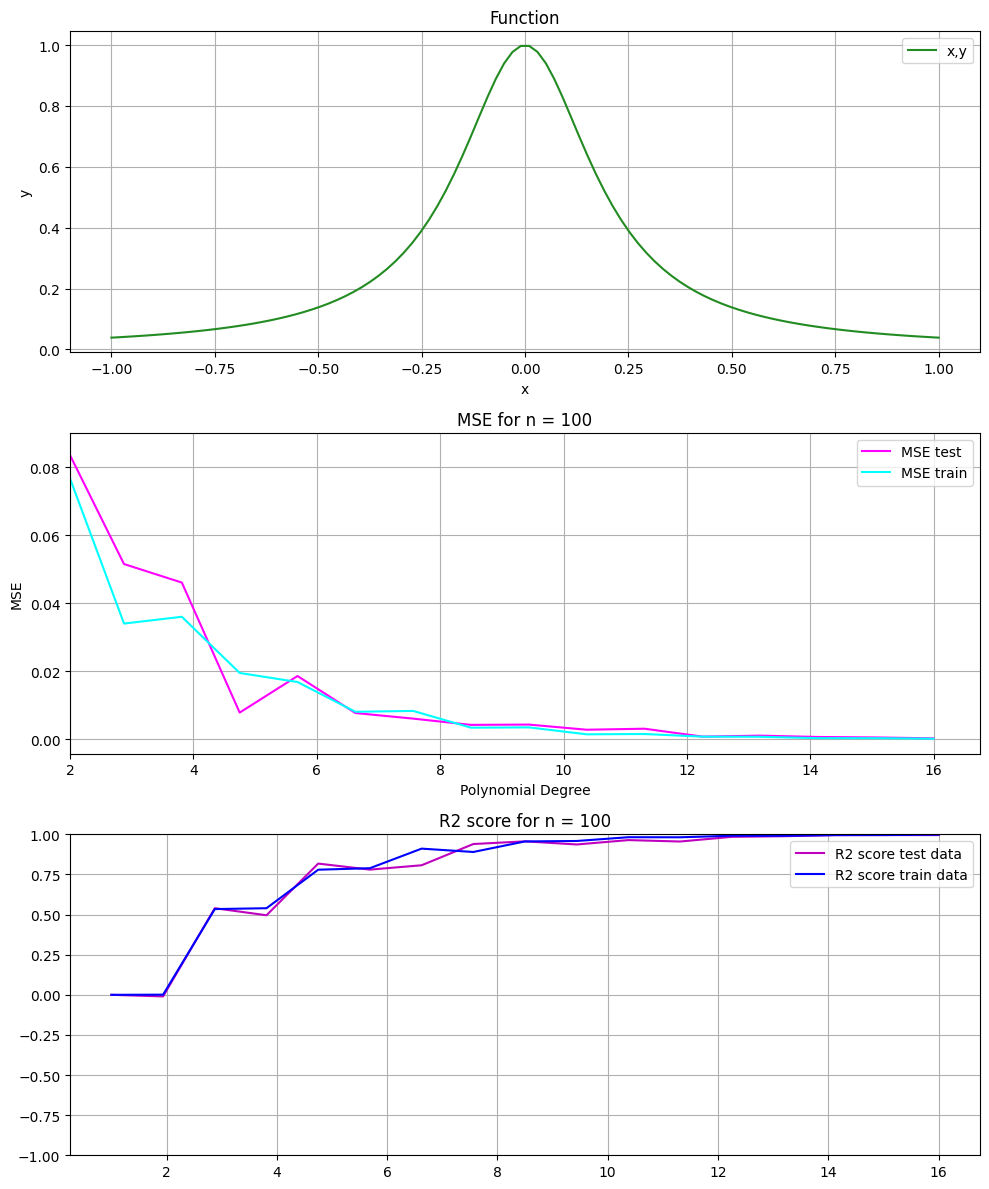

/var/folders/sq/5plwdlr95mscbwq45zg5whjc0000gn/T/ipykernel_58115/1875719197.py:53: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


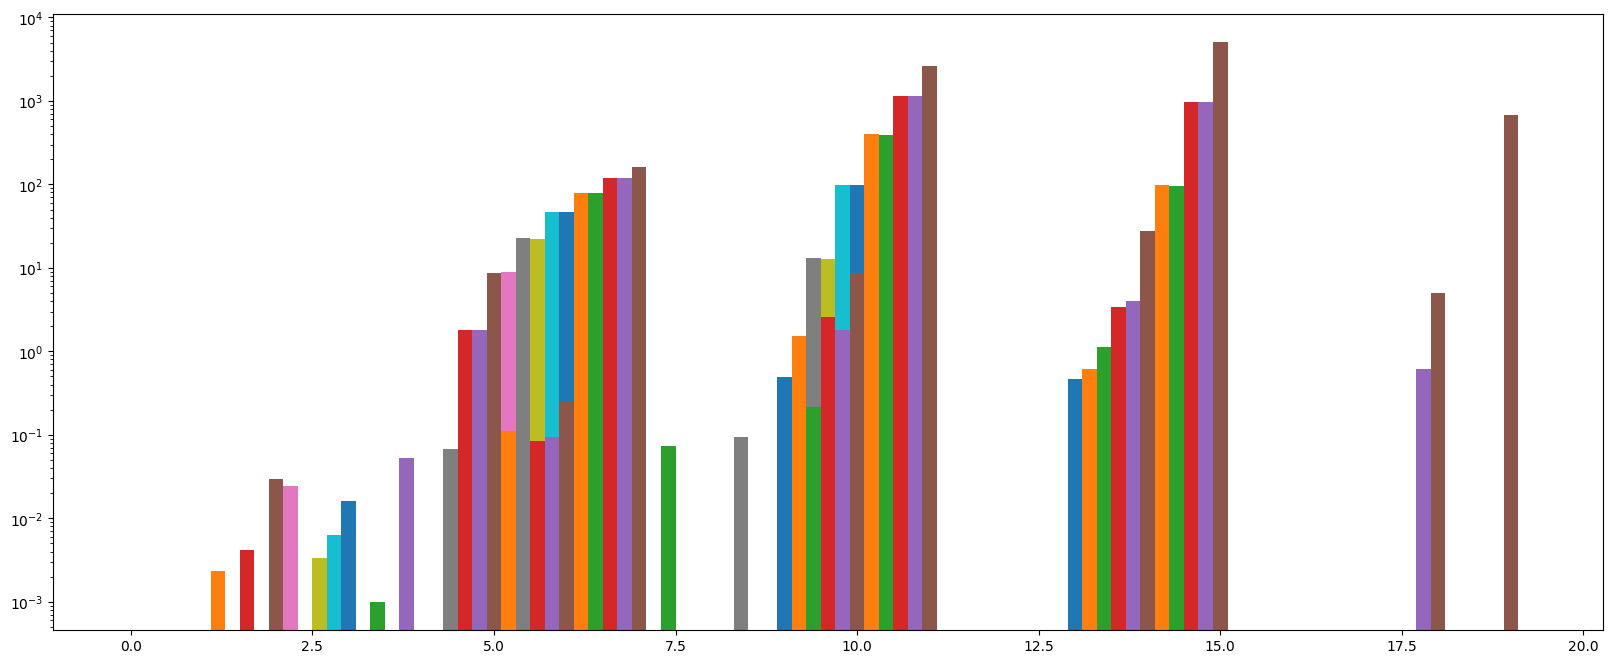

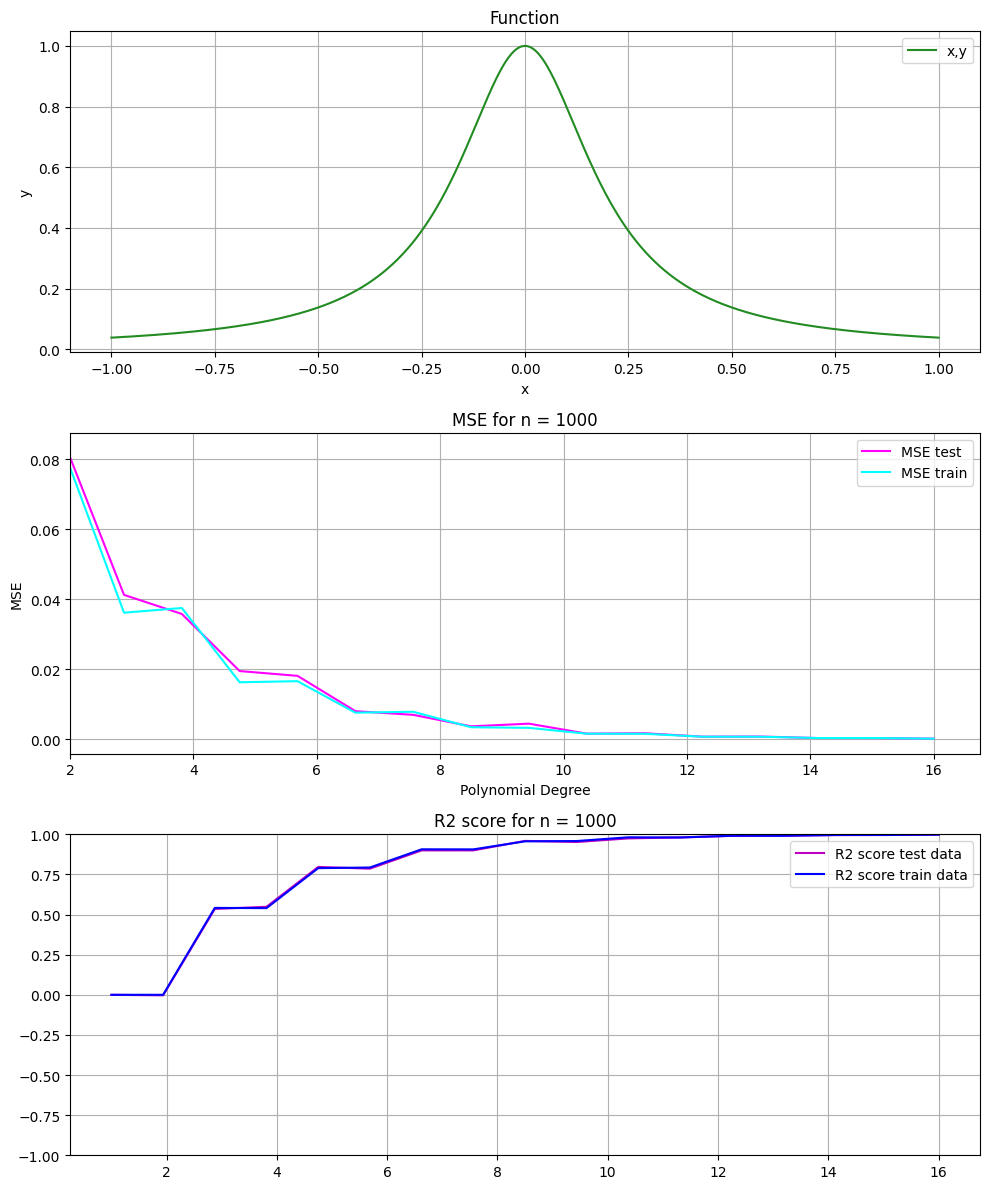

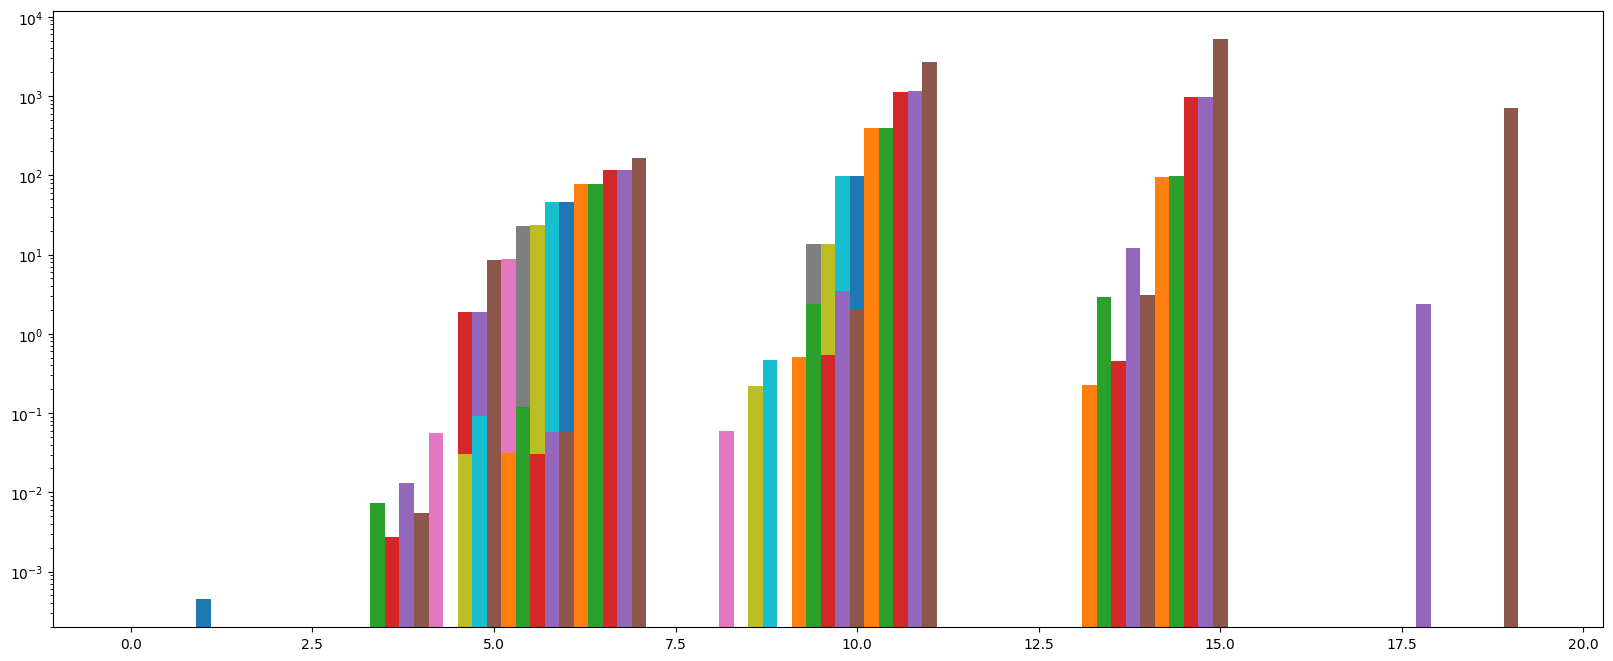

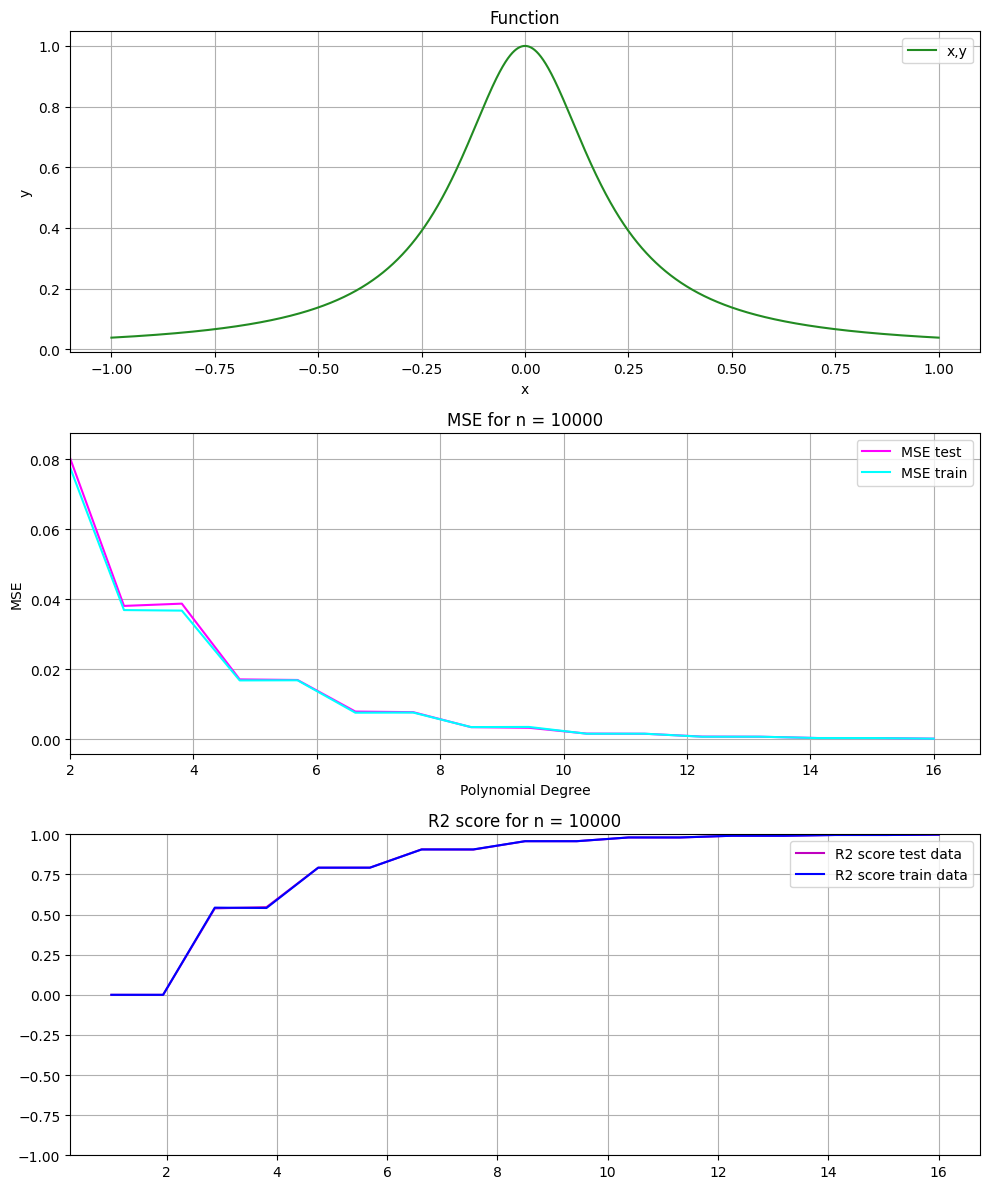

In [11]:
#Now that we have our design matrix, I will use the function mse_poly_plot
#explain the code later!!!!!!!

#MSE and changing the polynomial degree
def mse_poly_plot_OLS(degree, intercept=bool):
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        poly_deg = np.linspace(1,degree,degree+1)
        mse_train_list = np.zeros(degree+1)
        mse_test_list = np.zeros(degree+1)
        R2_test = np.zeros(degree+1)
        R2_train = np.zeros(degree+1)
        beta_matrix = np.zeros((degree+1, degree+1))

        #range polynomial degree
        for p in range(1, degree+1):
            X = polynomial_features(x,p,intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            scaler = StandardScaler(with_std = False)
            scaler.fit(X_train)
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_scaled_train = (y_train - y_mean)

            beta = OLS_parameters(X_train_s,y_scaled_train)
        
            y_pred_train = (X_train_s @ beta + y_mean)
            y_pred_test = (X_test_s @ beta + y_mean)

            mse_train_list[p] = MSE(y_train,y_pred_train)
            mse_test_list[p] = MSE(y_test, y_pred_test)

            R2_test[p] = r2_score(y_test, y_pred_test)
            #print(f'The R2 score is: {R2_test} for degree: {p}')
            R2_train[p] = r2_score(y_train, y_pred_train)

            for i in range(len(beta)):
                beta_matrix[p-1,i] = beta[i]
            #print(beta_matrix)
        
        num_rows, num_columns = beta_matrix.shape
        bar_width = 0.2
        r = np.arange(num_columns)
        plt.figure(figsize=(20,8))
        for m in range(num_rows): 
            plt.bar(r + m * bar_width, beta_matrix[m, :degree+1], label = f'Row: {m+1}', width=0.2)
            plt.yscale('log')

        fig,ax = plt.subplots(3, figsize=(10,12))
        ax[0].plot(x, y, label = "x,y", color = "forestgreen")
        ax[0].set_xlabel("x")
        ax[0].set_ylabel("y")
        ax[0].legend()
        ax[0].grid(True)
        ax[0].set_title('Function')
        ax[1].plot(poly_deg, mse_test_list, label = "MSE test", color = "magenta")
        ax[1].plot(poly_deg, mse_train_list, label = "MSE train", color = "cyan")
        ax[1].set_title(f'MSE for n = {n}')
        ax[1].set_ylabel("MSE")
        ax[1].set_xlabel("Polynomial Degree")
        ax[2].plot(poly_deg, R2_test, label = 'R2 score test data', color = 'm')
        ax[2].plot(poly_deg, R2_train, label = 'R2 score train data', color = 'b')
        ax[2].set_ylim(-1,1)
        ax[2].set_title(f'R2 score for n = {n}')
        ax[1].set_xlim(2)
        ax[1].grid(True)
        ax[1].legend()
        ax[2].legend()
        ax[2].grid(True)
        plt.tight_layout()
        plt.show()
    return mse_test_list, mse_train_list

mse_test_list_t1,mse_train_lis_t2 = mse_poly_plot_OLS(degree=16, intercept=False)

In the above code we have used the optimization of OLS to find the parameter theta of a 
linear regression model that best describes/fits our data by minimizing the sum 
sum of the squared differences between the actual data points and the predicted values.

# Exercise 1B

In [63]:
from func_list import Ridge_parameters

#MSE and changing lambda
def poly_plot_ridge(lambd, intercept=bool):
    nlambdas = 5 
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        mse_train_list = np.zeros(nlambdas)
        mse_test_list = np.zeros(nlambdas)
        R2_test = np.zeros(nlambdas)
        R2_train = np.zeros(nlambdas)
        beta_matrix = np.zeros((nlambdas+1, nlambdas))

        #range polynomial degree
        for p in range(1, nlambdas+1):
            X = polynomial_features(x,p,intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            scaler = StandardScaler(with_std = False)
            scaler.fit(X_train)
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_scaled_train = (y_train - y_mean)

            I = np.eye(p,p)
            lambdas = np.logspace(-5,1,lambd+1)
            for i in range(lambd):
                lmd = lambdas[i]
                beta = Ridge_parameters(X_train_s, y_scaled_train, lmd)

                y_pred_train = (X_train_s @ beta + y_mean)
                y_pred_test = (X_test_s @ beta + y_mean)

                mse_train_list[p-1] = MSE(y_train,y_pred_train)
                mse_test_list[p-1] = MSE(y_test, y_pred_test)

                R2_test[p-1] = r2_score(y_test, y_pred_test)
                #print(f'The R2 score is: {R2_test} for degree: {p}')
                R2_train[p-1] = r2_score(y_train, y_pred_train)

                #for i in range(len(beta)):
                    #beta_matrix[p-1,i] = beta[i]
                #print(beta_matrix)
        """
        num_rows, num_columns = beta_matrix.shape
        bar_width = 0.2
        r = np.arange(num_columns)
        plt.figure(figsize=(20,8))
        for m in range(num_rows): 
            plt.bar(r + m * bar_width, beta_matrix[m, :nlambdas+1], label = f'Row: {m+1}', width=0.2)
            plt.yscale('log')
        """
        fig,ax = plt.subplots(3, figsize=(10,12))
        ax[0].plot(x, y, label = "x,y", color = "forestgreen")
        ax[0].set_xlabel("x")
        ax[0].set_ylabel("y")
        ax[0].legend()
        ax[0].grid(True)
        ax[0].set_title('Function')
        ax[1].plot(lambdas, mse_test_list, label = "MSE test", color = "magenta")
        ax[1].plot(lambdas, mse_train_list, label = "MSE train", color = "cyan")
        ax[1].set_title(f'MSE for n = {n}')
        ax[1].set_ylabel("MSE")
        ax[1].set_xlabel("$\lambda$")
        ax[1].set_xscale('log')
        ax[2].plot(lambdas, R2_test, label = 'R2 score test data', color = 'm')
        ax[2].plot(lambdas, R2_train, label = 'R2 score train data', color = 'b')
        ax[2].set_xscale('log')
        ax[2].set_ylim(-1,1)
        ax[2].set_title(f'R2 score for n = {n}')
        ax[2].set_xlabel('$\lambda$')
        ax[2].set_ylabel('R2')
        ax[1].set_xlim(2)
        ax[1].grid(True)
        ax[1].legend()
        ax[2].legend()
        ax[2].grid(True)
        plt.tight_layout()
        plt.show()
    return mse_test_list, mse_train_list

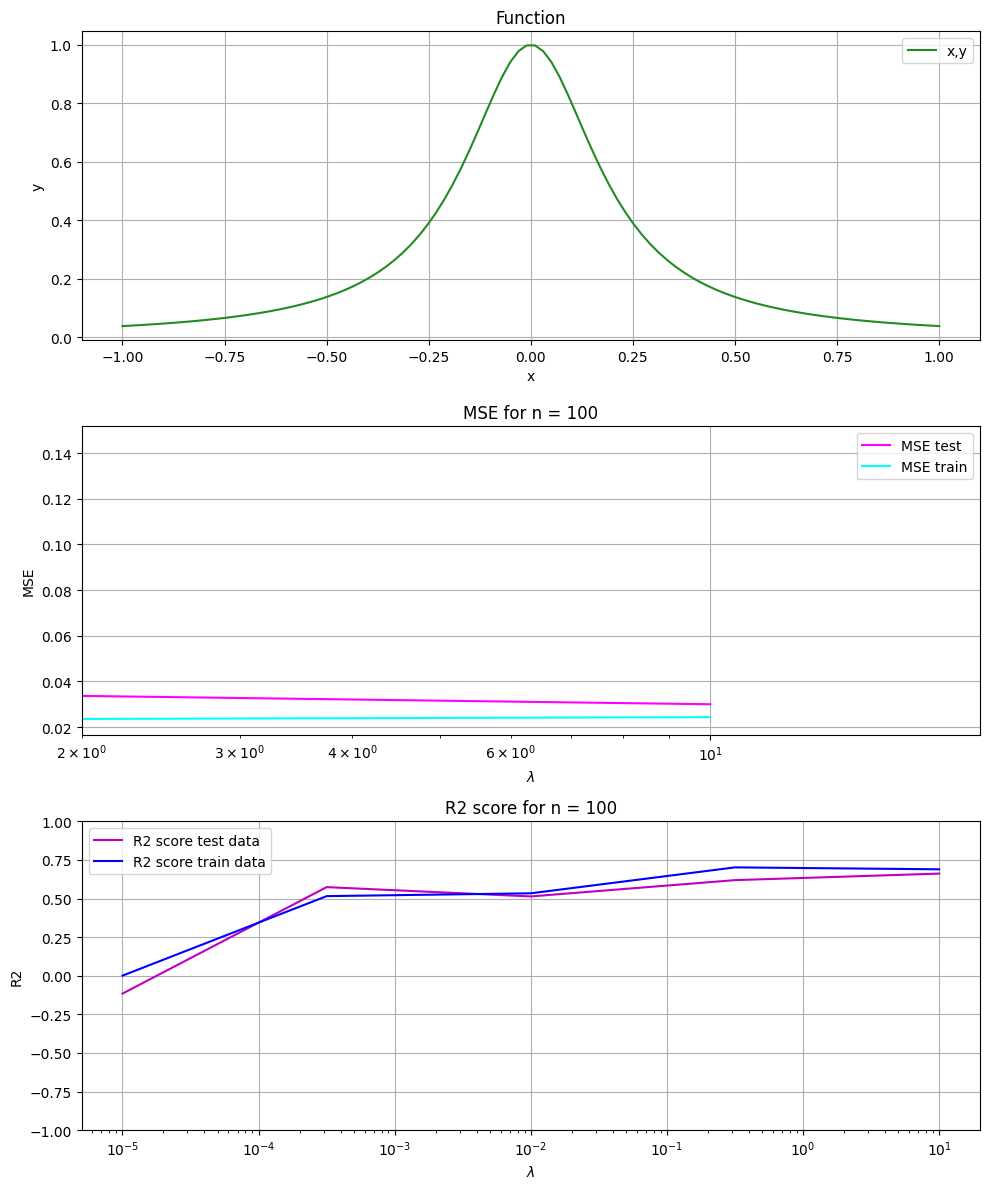

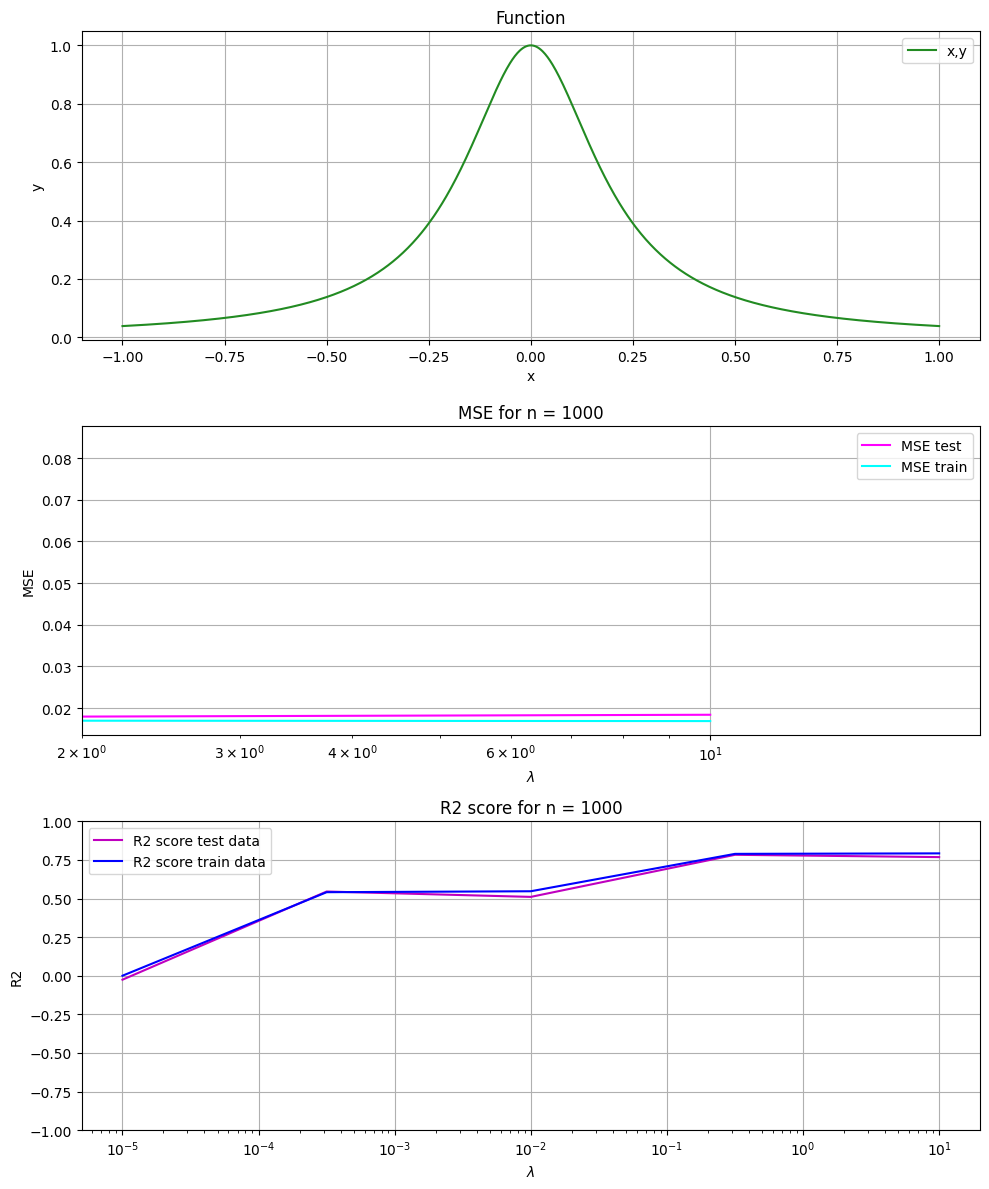

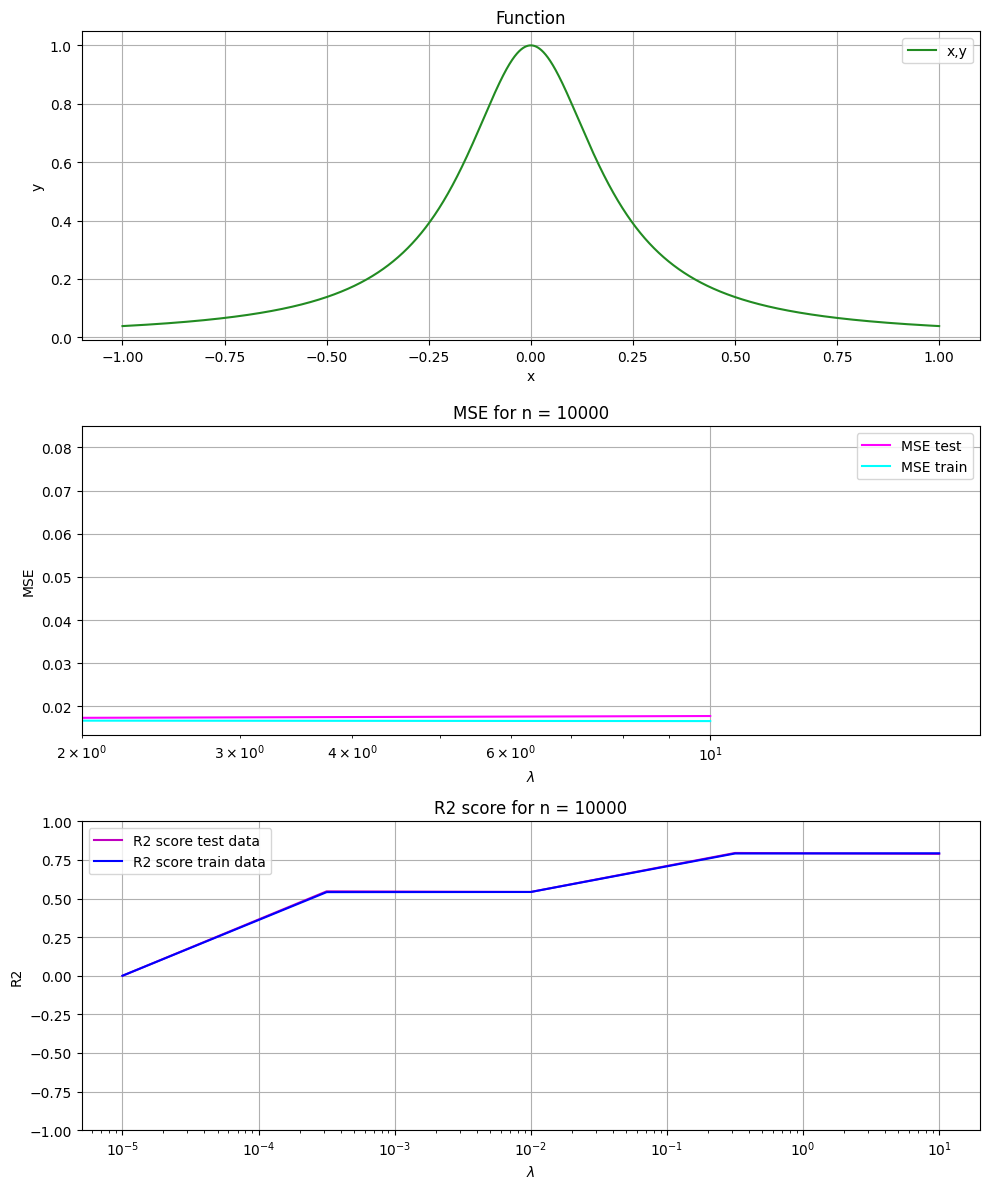

(array([0.07916256, 0.0376505 , 0.03856264, 0.01689368, 0.01778496]),
 array([0.08160971, 0.03697906, 0.03675272, 0.01682782, 0.01661288]))

In [64]:
poly_plot_ridge(lambd=4, intercept = False)